# Analyzing Marathon Data Across Canada and the US in 2020

In [1]:
# Data set: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633

In [2]:
# import libraries

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

/var/folders/lg/4_z3vd9d0934_pf45_gfp7140000gn/T/ipykernel_65647/2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [6]:
#See some of the data that's imported

In [7]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [8]:
df.shape

(7461195, 13)

In [9]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [10]:
# clean up the data

In [11]:
# Only want Canadian races, 50km, 2020 or later

In [12]:
# See how distance string value is stored, either as 'km' or 'k'. (its km)

In [13]:
df[df['Event distance/length'] == '50km']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461089,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:19:56 h,*QLD,AUS,1956.0,F,W35,11541.0,1046326
7461090,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:28:57 h,*QLD,AUS,1954.0,M,M40,11154.0,1070007
7461091,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:46:39 h,*QLD,AUS,1951.0,M,M40,10466.0,345672
7461092,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:47:39 h,*QLD,AUS,1939.0,M,M55,10429.0,1082443


In [14]:
# Look at all the 50km marathons ran in 2020

In [15]:
df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [16]:
df[df['Event name'].str.split("(").str.get(1).str.strip(")").isin(["USA", "CAN"])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [17]:
# combine filters together


In [18]:
spec_df = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split("(").str.get(1).str.strip(")").isin(["CAN", "USA"]) )]
spec_df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [19]:
spec_df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:42:06 h,"*Seattle, WA",USA,1985.0,F,W23,10.635,810282
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:20 h,"*Camano Island, WA",USA,1961.0,M,M55,10.369,11739
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:50 h,"*Clinton, WA",USA,1970.0,M,M45,10.351,80394
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:51:00 h,"*Seattle, WA",USA,1975.0,F,W40,10.309,140909
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,5:02:35 h,"*Sammamish, WA",USA,1979.0,M,M40,9.915,753889


In [20]:
# Now remove redundancy of CAN from event name

In [21]:
spec_df['Event name'] = spec_df['Event name'].str.split("(").str.get(0)

/var/folders/lg/4_z3vd9d0934_pf45_gfp7140000gn/T/ipykernel_65647/627514697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec_df['Event name'] = spec_df['Event name'].str.split("(").str.get(0)


In [22]:
spec_df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06 h,"*Seattle, WA",USA,1985.0,F,W23,10.635,810282
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20 h,"*Camano Island, WA",USA,1961.0,M,M55,10.369,11739
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50 h,"*Clinton, WA",USA,1970.0,M,M45,10.351,80394
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00 h,"*Seattle, WA",USA,1975.0,F,W40,10.309,140909
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35 h,"*Sammamish, WA",USA,1979.0,M,M40,9.915,753889


In [23]:
# remove redundancy of gender in ['Athlete age category'] by approximating athlete age

In [24]:
spec_df['Athlete age'] = 2020 - spec_df['Athlete year of birth']

/var/folders/lg/4_z3vd9d0934_pf45_gfp7140000gn/T/ipykernel_65647/865412717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec_df['Athlete age'] = 2020 - spec_df['Athlete year of birth']


In [25]:
spec_df['Athlete performance'] = spec_df['Athlete performance'].str.split(' ').str.get(0)

/var/folders/lg/4_z3vd9d0934_pf45_gfp7140000gn/T/ipykernel_65647/1366981615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec_df['Athlete performance'] = spec_df['Athlete performance'].str.split(' ').str.get(0)


In [26]:
# drop collumns: Athlete club, Athlete country, Athlete year of birth, Athlete Age Category, Year of event

In [27]:
spec_df = spec_df.drop(['Year of event', 'Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)

In [28]:
# sample of cleaned up data
spec_df.head(10)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
2539950,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06,F,10.635,810282,35.0
2539951,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20,M,10.369,11739,59.0
2539952,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50,M,10.351,80394,50.0
2539953,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00,F,10.309,140909,45.0
2539954,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35,M,9.915,753889,41.0


In [29]:
# clean up null values

In [30]:
spec_df.isna().sum()

Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete age                  269
dtype: int64

In [31]:
spec_df[spec_df['Athlete age'].isna() == 1]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2547794,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...
2749993,17.10.2020,Relentless at the Ark Trail Race,50km,18,7:54:15,M,6.326,857987,NaN
2749997,17.10.2020,Relentless at the Ark Trail Race,50km,18,9:55:27,M,5.038,857988,NaN
2755985,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [32]:
# get rid of Athlete_age.isna()

In [33]:
# before dropping

In [34]:
spec_df.shape

(26337, 9)

In [35]:
spec_df = spec_df.dropna()

In [36]:
# after dropping

In [37]:
spec_df.shape

(26068, 9)

In [38]:
# check for duplicates

In [39]:
spec_df[spec_df.duplicated() == True]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [40]:
# reset index

In [41]:
spec_df.reset_index(drop = True)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...
26063,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
26064,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
26065,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
26066,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


In [42]:
# fix types

In [43]:
spec_df.dtypes

Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [44]:
spec_df['Athlete age'] = spec_df['Athlete age'].astype(int)

In [45]:
spec_df['Athlete average speed'] = spec_df['Athlete average speed'].astype(float)

In [46]:
spec_df.dtypes

Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Athlete age                    int64
dtype: object

In [47]:
spec_df.head()

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [48]:
# Rename columns

In [49]:
# Event dates                  object
# Event name                   object
# Event distance/length        object
# Event number of finishers     int64
# Athlete performance          object
# Athlete gender               object
# Athlete average speed        object
# Athlete ID                    int64
# Athlete age                   int64

In [50]:
spec_df = spec_df.rename(columns = { 'Event dates': 'race_day',
                                     'Event name': 'race_name',
                                     'Event distance/length': 'race_length',
                                     'Event number of finishers': 'race_num_of_finishers',
                                     'Athlete performance': 'athlete_performance',
                                     'Athlete gender': 'athlete_gender',
                                     'Athlete average speed': 'athlete_average_speed',
                                     'Athlete ID': 'athlete_id',
                                     'Athlete age': 'athlete_age'
})

In [51]:
spec_df.head()

,race_day,race_name,race_length,race_num_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [52]:
# see male participants vs female participants

## Participation across long distances
From this graph, we can estimate from the data that as race distances increase in length, participation decreases.

<Axes: xlabel='race_length', ylabel='Count'>

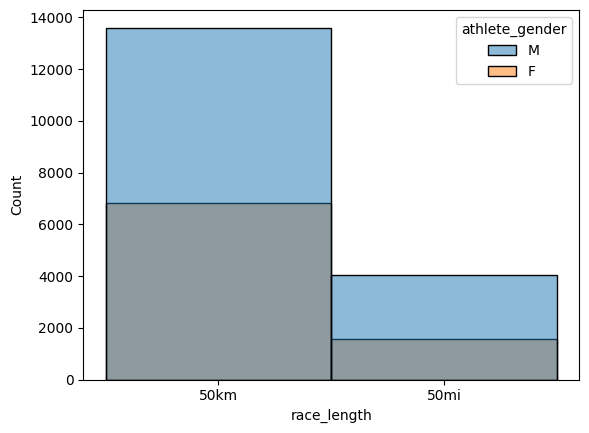

In [53]:
sns.histplot(spec_df, x = 'race_length', hue = 'athlete_gender')

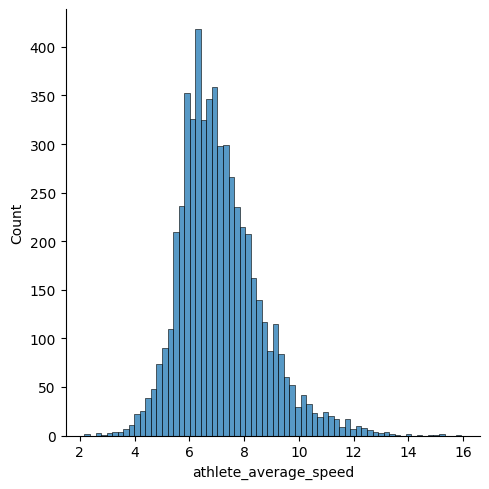

In [54]:
sns.displot(spec_df[spec_df['race_length'] == '50mi']['athlete_average_speed'])

## Longer Distances vs. Shorter Distances
Men perform better over short distances when compared to women, but women fair better over longer distances.

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

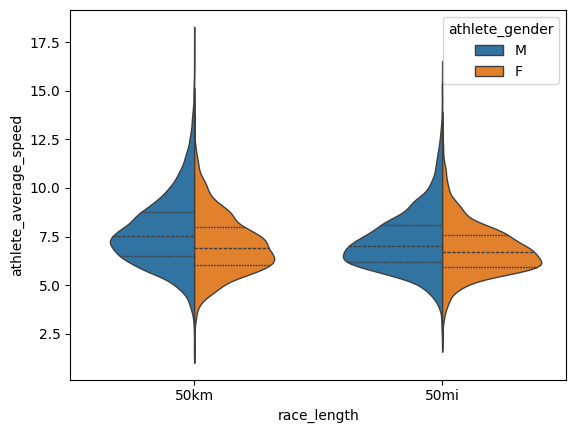

In [55]:
sns.violinplot(data = spec_df, x = 'race_length', y = 'athlete_average_speed', hue = 'athlete_gender', split= True, inner = 'quart', linewidth = 1)

## Decline of Performance Across Ages
Of course, as age increases, athlete performance declines. This decline is similar across men and women. 

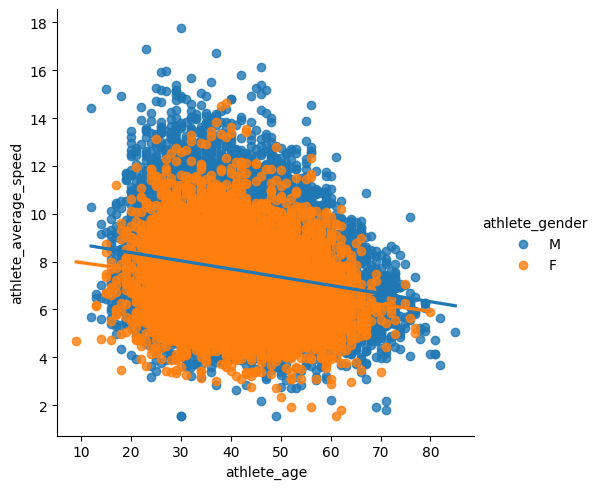

In [57]:
sns.lmplot(data = spec_df, x = 'athlete_age', y = 'athlete_average_speed', hue = 'athlete_gender')

## Key Questions from data

In [ ]:
# race_day
# race_name
# race_length	
# race_num_of_finishers
# athlete_performance	
# athlete_gender	
# athlete_average_speed	
# athlete_id	
# athlete_age

### Differences in Average Speed from 50km to 50mi

In [58]:
spec_df.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.082006
             M                 7.737151
50mi         F                 6.832252
             M                 7.256974
Name: athlete_average_speed, dtype: float64

### Which Age Groups Perform Best in 50mi Races?
Here we examine runners who've ran atleast 20 races. Below are the top 15 best running times. The average age among the top 15 best times is 30.4 years old.

In [66]:
spec_df.query("race_length == '50mi'").groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = False).query('count>19').head(15)

,mean,count
athlete_age,,
29,7.894774,137
23,7.779800,55
28,7.575252,107
30,7.557667,159
25,7.540923,91
31,7.437813,139
38,7.430022,231
35,7.422359,195
36,7.400011,186


### Which Age Groups Perform Worst in 50mi Races?
Here we examine runners who've ran atleast 10 races. Below are the top 15 worst running times. The average age among the top 15 worst times is 56.6 years old.

In [69]:
spec_df.query("race_length == '50mi'").groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = True).query('count>9').head(15)

,mean,count
athlete_age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31


### Do Runners Perform Better in Warmer Tempuratures or Cold?
As shown by the data below, runners perform the best in Spring time, and the worst in Summer. This is because of harsher conditions. 

In [70]:
spec_df['race_month'] = spec_df['race_day'].str.split('.').str.get(1).astype(int)

In [73]:
spec_df['race_season'] = spec_df['race_month'].apply(lambda x: 'Winter' if x>11 else 'Fall' if x>8 else 'Summer' if x>5 else 'Spring' if x>2 else 'Winter') 

In [81]:
spec_df.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.683536,3314
Winter,7.516004,11609
Fall,7.405782,8422
Summer,6.887897,2723
